In [1]:
import pandas as pd

/tmp/ipykernel_66424/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_bank_a = pd.read_csv('data/BankA.csv')
df_bank_b = pd.read_csv('data/BankB.csv')
df_bank_c = pd.read_csv('data/BankC.csv')

In [3]:
df_all = pd.concat([df_bank_a, df_bank_b, df_bank_c])

In [4]:
# strip all string values from the dataset
df = df_all.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:
# combine Never-worked and Without-pay into one category
df['workclass'] = df['workclass'].replace(['Never-worked', 'Without-pay'], 'Not-working')
df['workclass'] = df['workclass'].replace(['?', '*'], 'unknown')
df['workclass'].unique()

array(['Private', 'unknown', 'Self-emp-inc', 'State-gov', 'Local-gov',
       'Self-emp-not-inc', 'Federal-gov', 'Not-working'], dtype=object)

In [6]:
# combine Married-civ-spouse and Married-AF-spouse into one category
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status'].unique()

array(['Married', 'Married-spouse-absent', 'Never-married', 'Divorced',
       'Widowed', 'Separated'], dtype=object)

In [7]:
# replace income by 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [8]:
# replace occupation by 4 categories (low, medium, high, unknown) based on the mean of income
df['occupation'] = df['occupation'].replace(['Exec-managerial', 'Prof-specialty'], 'high')
df['occupation'] = df['occupation'].replace(['Armed-Forces', 'Protective-serv', 'Tech-support', 'Sales', 'Craft-repair', 'Transport-moving'], 'medium')
df['occupation'] = df['occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv'], 'low')
df['occupation'] = df['occupation'].replace(['?'], 'unknown')
df['occupation'].unique()

array(['high', 'medium', 'unknown', 'low'], dtype=object)

In [9]:
# combine Husband and Wife into one category
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Parent')
df['relationship'].unique()

array(['Parent', 'Other-relative', 'Own-child', 'Not-in-family',
       'Unmarried'], dtype=object)

In [10]:
# map native-country to continents
df['native-country'] = df['native-country'].str.strip()
df['native-country'] = df['native-country'].replace(['United-States', 'Puerto-Rico', 'Canada', 'Outlying-US(Guam-USVI-etc)', 'Cuba', 'Jamaica', 'Mexico', 'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Nicaragua', 'Trinadad&Tobago', 'Peru', 'Ecuador', 'Columbia', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Cuba', 'Outlying-US(Guam-USVI-etc)', 'Canada', 'United-States'], 'North-America')
df['native-country'] = df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 'Yugoslavia', 'Scotland', 'Greece', 'Hungary', 'Holand-Netherlands'], 'Europe')
df['native-country'] = df['native-country'].replace(['Philippines', 'India', 'China', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Hong', 'Cambodia', 'Laos'], 'Asia')
df['native-country'] = df['native-country'].replace(['South', 'Columbia', 'Ecuador', 'Peru'], 'South-America')
df['native-country'] = df['native-country'].replace(['Trinadad&Tobago', 'Honduras', 'Haiti', 'Guatemala', 'El-Salvador', 'Dominican-Republic', 'Columbia', 'Ecuador', 'Peru'], 'Central-America')
df['native-country'] = df['native-country'].replace(['?', '*'], 'Unknown')
df['native-country'].unique()

array(['North-America', 'Unknown', 'Asia', 'Europe', 'South-America'],
      dtype=object)

In [11]:
df['education'] = df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df['education'].unique()


array(['Bachelors', 'higher', 'Masters', 'Doctorate', 'HS-grad', 'school'],
      dtype=object)

In [12]:
# Drop the fnlwgt column
df.drop(['fnlwgt'], axis=1, inplace=True)

# Drop the education column
# df.drop(['education'], axis=1, inplace=True)

# Drop the capital-gain column
# df.drop(['capital-gain'], axis=1, inplace=True)

# Drop the capital-loss column
# df.drop(['capital-loss'], axis=1, inplace=True)


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
 
for column in df[categorical_columns].columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n" + "="*30 + "\n")

Column: institute
institute
Bank B    403240
Bank A    226164
Bank C    170595
Name: count, dtype: int64


Column: workclass
workclass
Private             546342
Self-emp-not-inc     66145
Local-gov            51137
unknown              47431
State-gov            34717
Self-emp-inc         27715
Federal-gov          25879
Not-working            633
Name: count, dtype: int64


Column: education
education
HS-grad      258661
higher       241834
Bachelors    133796
school       110209
Masters       45697
Doctorate      9802
Name: count, dtype: int64


Column: marital-status
marital-status
Married                  368820
Never-married            250510
Divorced                 110459
Widowed                   34203
Separated                 25566
Married-spouse-absent     10441
Name: count, dtype: int64


Column: occupation
occupation
low        281223
medium     259651
high       211330
unknown     47795
Name: count, dtype: int64


Column: relationship
relationship
Parent            36276

In [14]:
# drop institute column
df_all = df.drop(['institute'], axis=1)
df_bank_a = df[df['institute'] == 'Bank A']
df_bank_b = df[df['institute'] == 'Bank B']
df_bank_c = df[df['institute'] == 'Bank C']

In [15]:
# encode the categorical variables
df = pd.get_dummies(df_all, drop_first=True)

In [16]:
# model preparation for decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred)

In [17]:
# encode the categorical variables
df = pd.get_dummies(df_bank_a, drop_first=True)

X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_bank_a = accuracy_score(y_test, y_pred)

In [18]:
# encode the categorical variables
df = pd.get_dummies(df_bank_b, drop_first=True)

X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_bank_b = accuracy_score(y_test, y_pred)

In [19]:
# encode the categorical variables
df = pd.get_dummies(df_bank_c, drop_first=True)

X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_bank_c = accuracy_score(y_test, y_pred)

In [20]:
# print the accuracy of the model
print(f"Accuracy Bank all: {accuracy_all}")
print(f"Accuracy Bank A  : {accuracy_bank_a}")
print(f"Accuracy Bank B  : {accuracy_bank_b}")
print(f"Accuracy Bank C  : {accuracy_bank_c}")

Accuracy Bank all: 0.8301625
Accuracy Bank A  : 0.7881635089425861
Accuracy Bank B  : 0.8305475647257217
Accuracy Bank C  : 0.851988628037164


In [21]:
importances = dt.feature_importances_

In [23]:
df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Not-working', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_unknown', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_higher', 'education_school',
       'marital-status_Married', 'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_low', 'occupation_medium',
       'occupation_unknown', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Parent',
       'relationship_Unmarried', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Male', 'native-country_Europe',
       'native-country_North-America', 'native-country_South-America',
       'native-country_Unknown'],
      dtype='obj

In [22]:
importances

array([0.17286158, 0.16832727, 0.14637758, 0.05604617, 0.10130071,
       0.00944575, 0.00021026, 0.01554346, 0.00696027, 0.00987255,
       0.0078826 , 0.00273604, 0.00057638, 0.0010287 , 0.00244892,
       0.0022903 , 0.0008867 , 0.00139594, 0.00116828, 0.00542915,
       0.00274973, 0.00276907, 0.00995741, 0.0124245 , 0.00237072,
       0.00146182, 0.00240024, 0.19050833, 0.0056735 , 0.00431482,
       0.00863854, 0.00258568, 0.01151077, 0.01296396, 0.00510737,
       0.00725579, 0.00078932, 0.00372984])

In [27]:
import numpy as np
import matplotlib.pyplot as plt

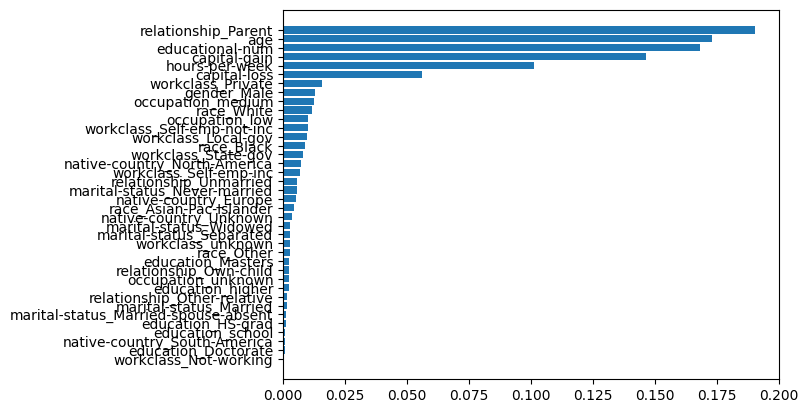

In [28]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])


In [29]:
df

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Not-working,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Europe,native-country_North-America,native-country_South-America,native-country_Unknown
0,55,16,8614,0,50,1,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False
1,45,13,0,0,40,0,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,36,13,0,0,50,1,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
3,25,13,0,1772,40,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
4,35,14,0,1887,40,1,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170590,17,6,0,0,36,0,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False
170591,17,7,0,0,20,0,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False
170592,28,5,0,0,40,0,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
170593,17,7,0,0,5,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
